In [73]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats
from numpy.lib.function_base import corrcoef

# Leer CSV

In [107]:
pokemon_df = pd.read_csv("pokemon_data.csv")

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


# Quitar Megaevoluciones y calcular puntuación total

In [108]:
pokemon_df.drop(pokemon_df[pokemon_df['Name'].str.contains('Mega')].index, inplace=True)

pokemon_df['Total'] = pokemon_df.iloc[:,4:9].sum(axis=1)

pokemon_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,273
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,345
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,445
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,244
5,5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,325
...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,718,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True,505
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True,550
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True,530
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,600


# Separar legendarios y no legendarios


In [109]:
grouped = pokemon_df.groupby(pokemon_df.Legendary)

legendary_df  = grouped.get_group(True)
non_legendary_df  = grouped.get_group(False)

# Legendarios

In [110]:
legendary_df.head(5)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
156,144,Articuno,Ice,Flying,90,85,100,95,125,85,1,True,495
157,145,Zapdos,Electric,Flying,90,90,85,125,90,100,1,True,480
158,146,Moltres,Fire,Flying,90,100,90,125,85,90,1,True,490
162,150,Mewtwo,Psychic,NaN,106,110,90,154,90,130,1,True,550
262,243,Raikou,Electric,NaN,90,85,75,115,100,115,2,True,465


# Porcentaje de pokemon legendarios de cada tipo

In [111]:
tab = pd.crosstab(index=legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Dark,3.389831
Dragon,15.254237
Electric,6.779661
Fairy,1.694915
Fire,8.474576
Flying,3.389831
Ghost,3.389831
Grass,5.084746
Ground,6.779661


# Ploteamos en grafico de sectores

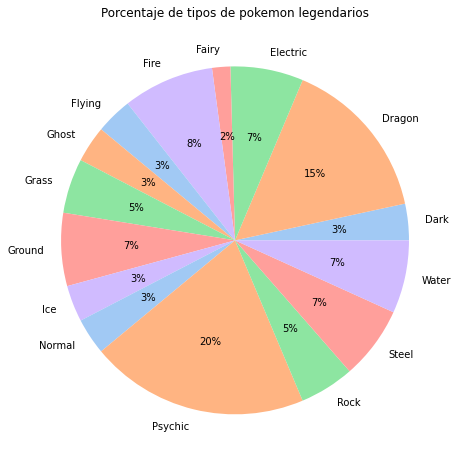

In [112]:
#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

In [113]:
legendary_df.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Total
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,481.355932,93.237288,113.118644,99.627119,117.864407,104.847458,98.254237,3.864407,528.694915
std,167.747631,21.786851,27.968014,29.270968,28.806404,29.562799,22.936639,1.395283,57.782665
min,144.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,420.000000
25%,382.000000,80.000000,92.500000,87.500000,100.000000,90.000000,90.000000,3.000000,480.000000
50%,485.000000,91.000000,110.000000,95.000000,120.000000,100.000000,95.000000,4.000000,510.000000
75%,642.000000,102.500000,129.500000,117.500000,133.000000,120.000000,109.000000,5.000000,580.500000
max,721.000000,150.000000,180.000000,200.000000,180.000000,200.000000,180.000000,6.000000,680.000000


# Box plot total

<AxesSubplot:>

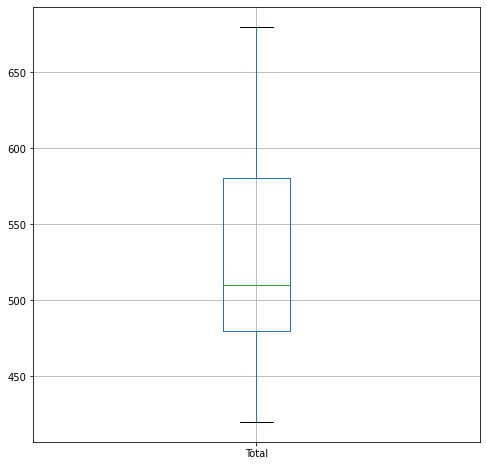

In [114]:
plt.figure(figsize=(8,8))

legendary_df.boxplot('Total')

<AxesSubplot:>

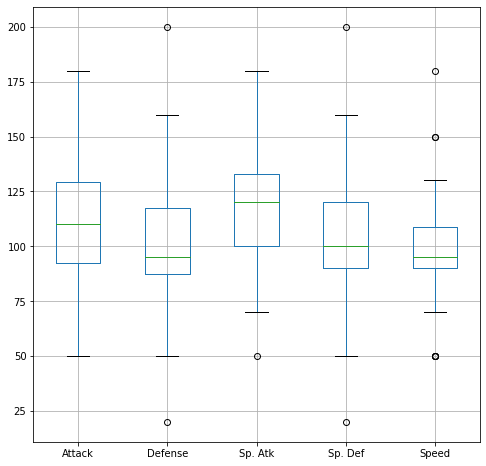

In [115]:
plt.figure(figsize=(8,8))
legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Scatter plot legendarios


array([[1.        , 0.49505373],
       [0.49505373, 1.        ]])

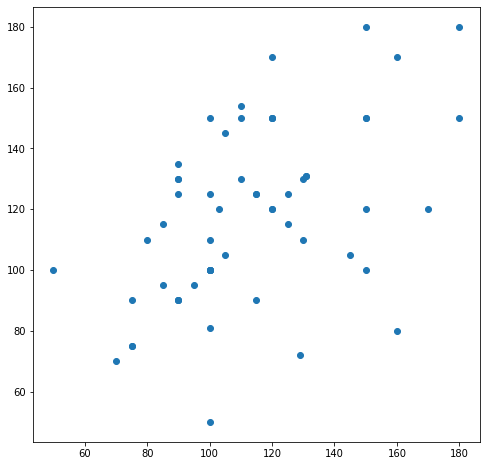

In [116]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Attack"],legendary_df["Sp. Atk"])
corrcoef(legendary_df["Attack"],legendary_df["Sp. Atk"])

array([[1.        , 0.38182772],
       [0.38182772, 1.        ]])

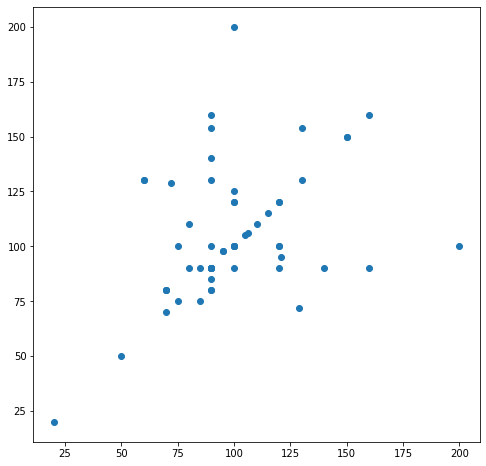

In [117]:
plt.figure(figsize=(8,8))

plt.scatter(legendary_df["Defense"],legendary_df["Sp. Def"])
corrcoef(legendary_df["Defense"],legendary_df["Sp. Def"])

# Top 5

In [118]:
legendary_df = legendary_df.sort_values('Total', ascending=False).head(5)

legendary_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
424,383,GroudonPrimal Groudon,Ground,Fire,100,180,160,150,90,90,3,True,680
422,382,KyogrePrimal Kyogre,Water,NaN,100,150,90,180,160,90,3,True,680
711,646,KyuremBlack Kyurem,Dragon,Ice,125,170,100,120,90,95,5,True,605
712,646,KyuremWhite Kyurem,Dragon,Ice,125,120,90,170,100,95,5,True,605
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True,600


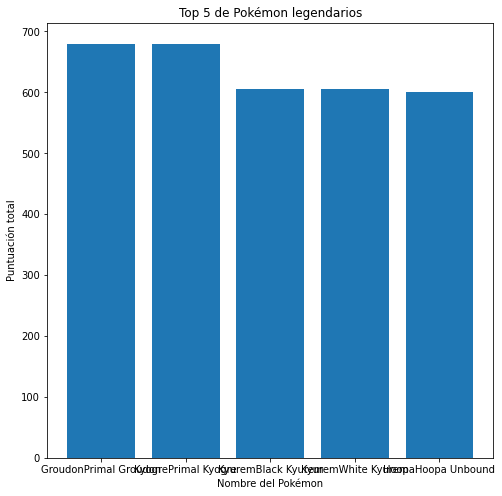

In [119]:
plt.figure(figsize=(8,8))

plt.bar(legendary_df['Name'], legendary_df['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon legendarios')
plt.show()

# No legendarios

# Sacar porcentaje de tipo

In [121]:
tab = pd.crosstab(index=non_legendary_df['Type 1'], columns='count')

porcentajes = (tab/tab.sum())*100

porcentajes

col_0,count
Type 1,
Bug,9.393064
Dark,3.757225
Dragon,2.456647
Electric,5.491329
Fairy,2.312139
Fighting,3.612717
Fire,6.213873
Flying,0.289017
Ghost,4.046243


<Figure size 576x576 with 0 Axes>

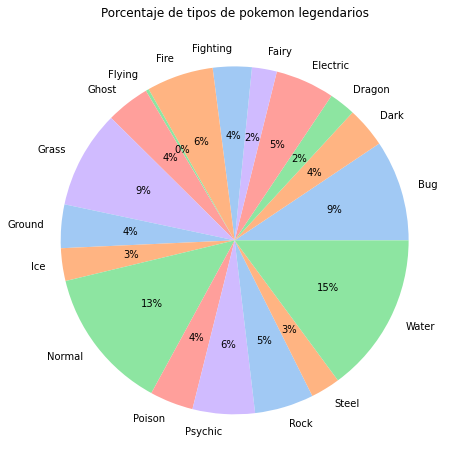

In [122]:
plt.figure(figsize=(8,8))

#define Seaborn color palette to use

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.figure(figsize=(8,8))
plt.title('Porcentaje de tipos de pokemon legendarios')
plt.pie(porcentajes['count'], labels = porcentajes.index, colors = colors, autopct='%.0f%%')
plt.show()

# Box and Whiskers de Ataques y Defensa

<AxesSubplot:>

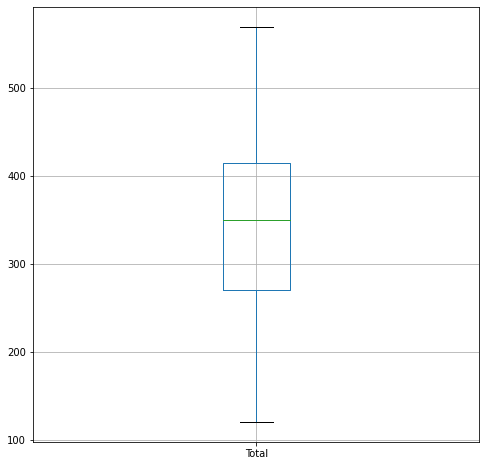

In [123]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot('Total')

<AxesSubplot:>

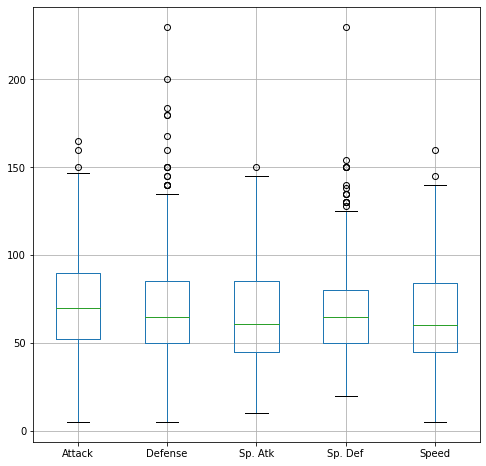

In [124]:
plt.figure(figsize=(8,8))

non_legendary_df.boxplot(column=["Attack","Defense","Sp. Atk","Sp. Def","Speed"])

# Scatter plot

array([[1.        , 0.23280414],
       [0.23280414, 1.        ]])

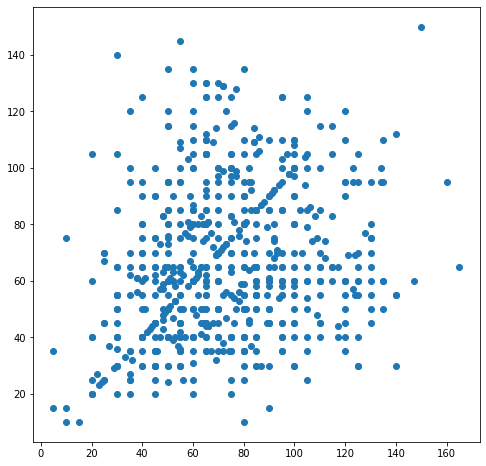

In [125]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])
corrcoef(non_legendary_df["Attack"],non_legendary_df["Sp. Atk"])

array([[1.        , 0.45072588],
       [0.45072588, 1.        ]])

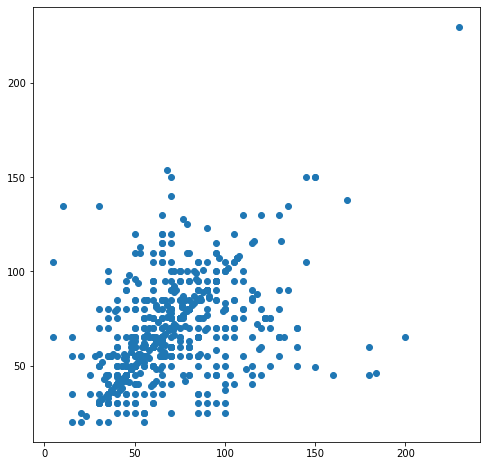

In [126]:
plt.figure(figsize=(8,8))

plt.scatter(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])
corrcoef(non_legendary_df["Defense"],non_legendary_df["Sp. Def"])

# Top 5

In [127]:
non_legendary_df = non_legendary_df.sort_values('Total', ascending=False).head(5)

non_legendary_df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Total
313,289,Slaking,Normal,NaN,150,160,100,95,65,100,3,False,570
267,248,Tyranitar,Rock,Dark,100,134,110,95,100,61,2,False,539
412,376,Metagross,Steel,Psychic,80,135,130,95,90,70,3,False,530
161,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,1,False,520
776,706,Goodra,Dragon,NaN,90,100,70,110,150,80,6,False,520


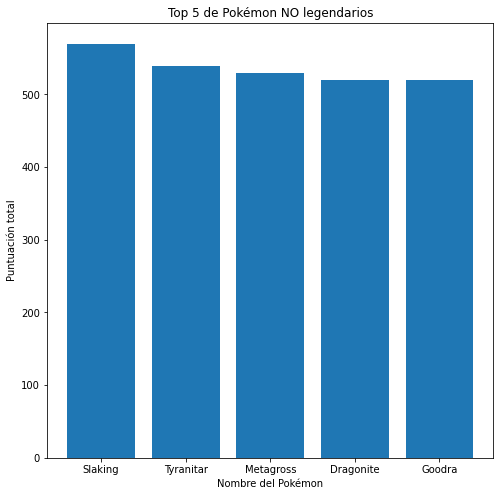

In [128]:
plt.figure(figsize=(8,8))

plt.bar(non_legendary_df['Name'], non_legendary_df['Total'])
plt.xlabel('Nombre del Pokémon')
plt.ylabel('Puntuación total')
plt.title('Top 5 de Pokémon NO legendarios')
plt.show()

# Puntuación total de legendarios y no legendarios según el tipo

<AxesSubplot:xlabel='Type 1', ylabel='Total'>

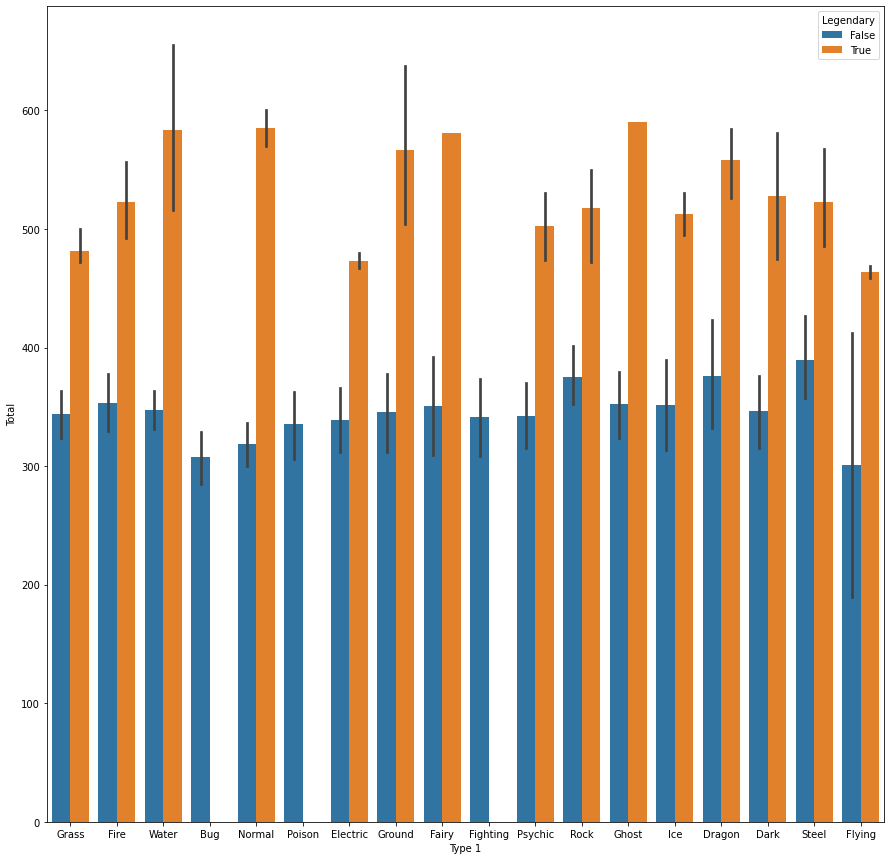

In [129]:
plt.figure(figsize=(15,15))

sns.barplot(data=pokemon_df, x="Type 1", y="Total", hue="Legendary")